## 서포트 벡터 머신 (Support Vector Machine, SVM)

서포트 벡터 머신(SVM)은 분류를 위한 강력한 지도학습 모델이다. SVM은 각 데이터 포인트들을 고차원 공간의 점으로 표현하고, 두 카테고리를 가장 넓은 '여백'(margin)으로 나누는 초평면(hyperplane)을 찾는다. 이 결정 경계(decision boundary)는 새로운 데이터가 주어졌을 때 어느 카테고리에 속할지 예측하는 데 사용된다.

### 핵심 개념
- **결정 경계(Decision Boundary):** 데이터를 두 클래스로 나누는 경계선.
- **초평면(Hyperplane):** n-차원 공간에서 n-1 차원의 부분 공간. 2차원에서는 선, 3차원에서는 평면이다.
- **마진(Margin):** 결정 경계와 가장 가까운 각 클래스의 데이터 포인트(서포트 벡터) 사이의 거리. SVM은 이 마진을 최대화하는 것을 목표로 한다.
- **서포트 벡터(Support Vectors):** 마진을 결정하는, 결정 경계에 가장 가까이 있는 데이터 포인트들이다. 이 벡터들이 결정 경계를 지지(support)하는 것처럼 보이기 때문에 이런 이름이 붙었다.

### 1. 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

### 2. 예제 데이터 생성

분류를 위한 간단한 2차원 데이터셋 생성. `make_blobs`를 사용하여 두 개의 클러스터를 가진 데이터를 만든다.

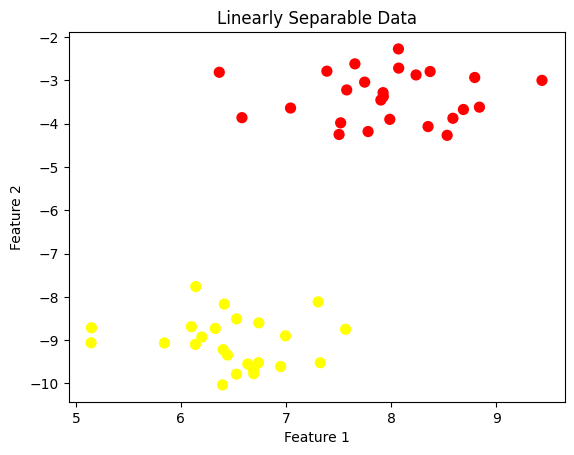

In [2]:
# 데이터 생성
X, y = make_blobs(n_samples=50, centers=2, random_state=6, cluster_std=0.6)

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable Data")
plt.show()

### 3. SVM 모델 학습

선형 커널을 사용하는 SVM 모델을 생성하고 학습시킨다. 선형 커널은 데이터가 선형적으로 분리 가능할 때 사용된다.

In [3]:
# 선형 SVM 모델 생성 및 학습
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)
print("SVM 모델 학습 완료")

SVM 모델 학습 완료


### 4. 결정 경계 및 마진 시각화

학습된 SVM 모델의 결정 경계, 마진, 그리고 서포트 벡터를 시각화하여 확인한다.

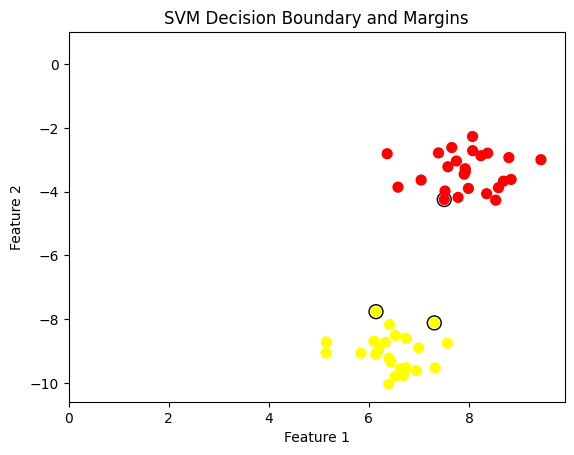

In [4]:
# 시각화를 위한 함수 정의
def plot_svm_boundary(model, X, y):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 격자 생성
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # 결정 경계와 마진 그리기
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # 서포트 벡터 강조
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    # 원본 데이터 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary and Margins")
    plt.show()

# 시각화 실행
plot_svm_boundary(clf, X, y)

#### 시각화 결과 분석
- **실선:** 두 클래스를 나누는 최적의 결정 경계(초평면)이다.
- **점선:** 마진의 경계를 나타낸다.
- **검은색 원으로 표시된 점:** 서포트 벡터이다. 이 점들이 결정 경계와 마진을 결정하는 데 사용되었다.

### 5. 흔히 발생하는 실수: 데이터 스케일링

SVM은 각 피처(feature)의 거리를 기반으로 동작하므로, 피처들의 스케일이 다르면 성능에 큰 영향을 받을 수 있다. 따라서 SVM을 사용하기 전에는 일반적으로 데이터 스케일링(예: StandardScaler)을 적용하는 것이 매우 중요하다. 이 예제에서는 `make_blobs`가 비슷한 스케일의 데이터를 생성했으므로 생략했지만, 실제 데이터에서는 필수적인 전처리 단계이다.

### 6. 비선형 데이터와 커널 트릭
현실의 데이터는 선형적으로 분리되지 않는 경우가 많다. 이 경우, SVM은 **커널 트릭(Kernel Trick)**을 사용하여 데이터를 더 높은 차원으로 매핑하여 선형 분리가 가능하게 만든다.

RBF(Radial Basis Function) 커널이 대표적인 예이다.

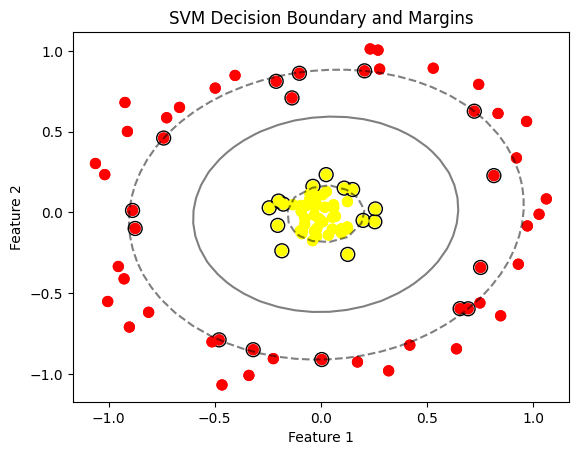

In [5]:
from sklearn.datasets import make_circles

# 비선형 데이터 생성
X_nonlin, y_nonlin = make_circles(100, factor=.1, noise=.1, random_state=1)

# RBF 커널을 사용한 SVM 모델 학습
clf_nonlin = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
clf_nonlin.fit(X_nonlin, y_nonlin)

# 데이터 및 결정 경계 시각화
plt.scatter(X_nonlin[:, 0], X_nonlin[:, 1], c=y_nonlin, s=50, cmap='autumn')
plot_svm_boundary(clf_nonlin, X_nonlin, y_nonlin)

#### 비선형 결과 분석
선형 커널로는 분리할 수 없는 원형 데이터를 RBF 커널을 사용하여 효과적으로 분리한 것을 확인할 수 있다. RBF 커널은 데이터를 무한 차원의 공간으로 매핑하여 복잡한 결정 경계를 생성한다.

### 한 문장 요약

서포트 벡터 머신은 클래스 간의 마진을 최대화하는 결정 경계를 찾아 분류를 수행하는 지도학습 알고리즘이다.